Ex 1

In [4]:
file = open('Homework_sampledata1.txt')
lines = file.readlines()
file.close()
lines = lines[1:]
for i in range(len(lines)):
    lines[i] = lines[i].split()[1:]
for i in range(len(lines)):
    for j in range(len(lines[i])):
        lines[i][j] = float(lines[i][j])


In [5]:
import itertools

In [6]:
all_day_temperature = list(itertools.chain.from_iterable(lines))
all_day_temperature.sort()
all_day_temperature_draw = all_day_temperature.copy()
count = 0
for i in range(len(all_day_temperature_draw)):
    if all_day_temperature_draw[i] == -99:
        count += 1
all_day_temperature_draw = all_day_temperature_draw[count:]


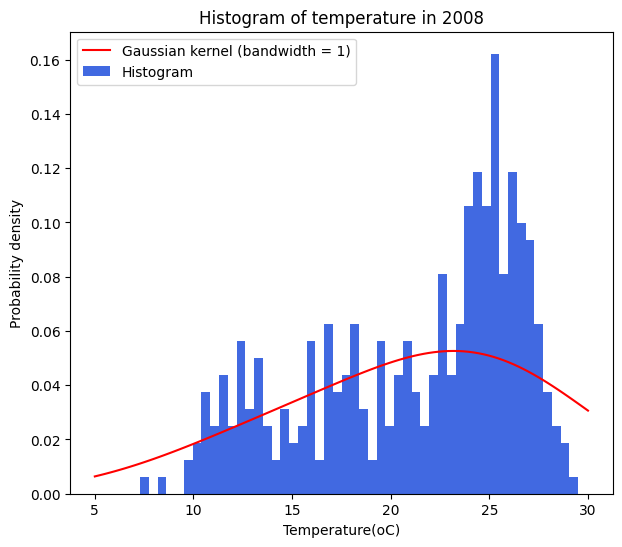

In [9]:
from scipy.stats import gaussian_kde
import numpy as np
import matplotlib.pyplot as plt
kde = gaussian_kde(all_day_temperature_draw, bw_method = 1)
x = np.linspace(5, 30, 100)
plt.figure(figsize = (7,6))
plt.hist(all_day_temperature_draw, bins=50, color='royalblue', density=True)
plt.plot(x, kde(x), color='red')
plt.xlabel('Temperature(oC)')
plt.ylabel('Probability density')
plt.title('Histogram of temperature in 2008')
plt.legend(['Gaussian kernel (bandwidth = 1)', 'Histogram'])
plt.show()

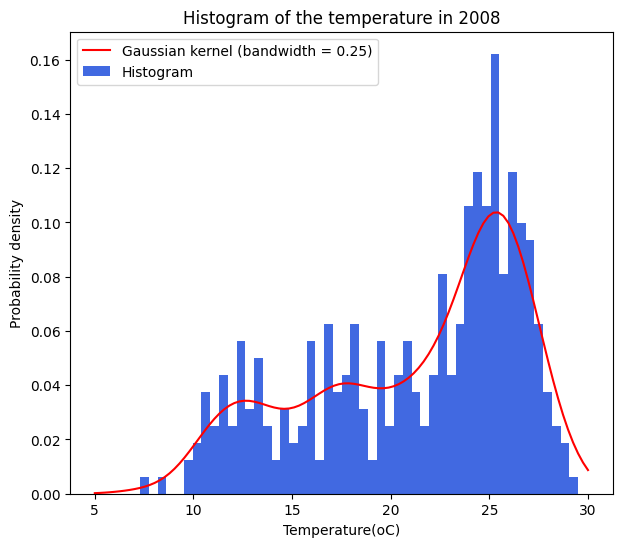

In [10]:
kde = gaussian_kde(all_day_temperature_draw, bw_method = 0.25)
x = np.linspace(5, 30, 100)
plt.figure(figsize = (7,6))
plt.hist(all_day_temperature_draw, bins=50, color='royalblue', density=True)
plt.plot(x, kde(x), color='red')
plt.xlabel('Temperature(oC)')
plt.ylabel('Probability density')
plt.title('Histogram of the temperature in 2008')
plt.legend(['Gaussian kernel (bandwidth = 0.25)', 'Histogram'])
plt.show()

Ex 2

In [11]:
all_day_temperature_box = lines.copy()
all_day_temperature_box = list(map(list, zip(*all_day_temperature_box)))


In [12]:
for i in range(len(all_day_temperature_box)):
    all_day_temperature_box[i] = [x for x in all_day_temperature_box[i] if x != -99]
    

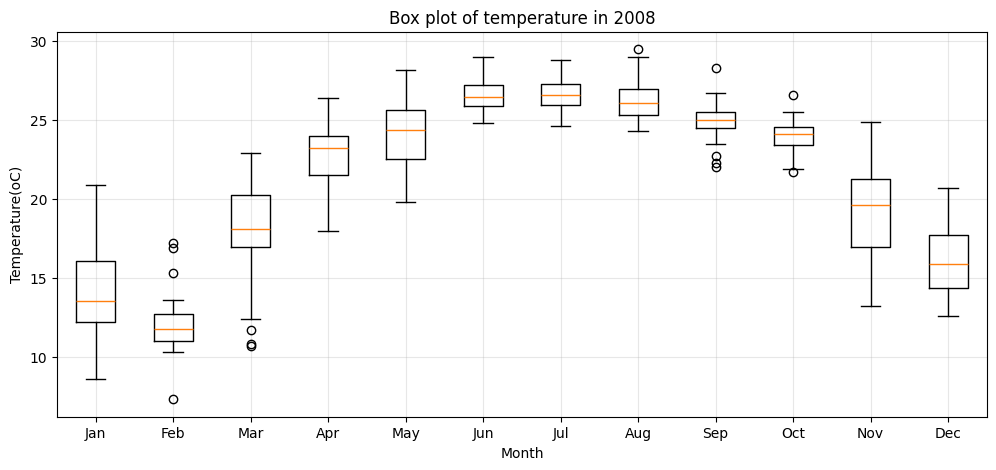

In [14]:
plt.figure(figsize=(12,5))
plt.boxplot(all_day_temperature_box)
plt.grid(True, alpha=0.3)
plt.xlabel('Month')
plt.ylabel('Temperature(oC)')
plt.xticks(np.arange(1,13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.title('Box plot of temperature in 2008')
plt.show()

Ex 3

<function matplotlib.pyplot.show(close=None, block=None)>

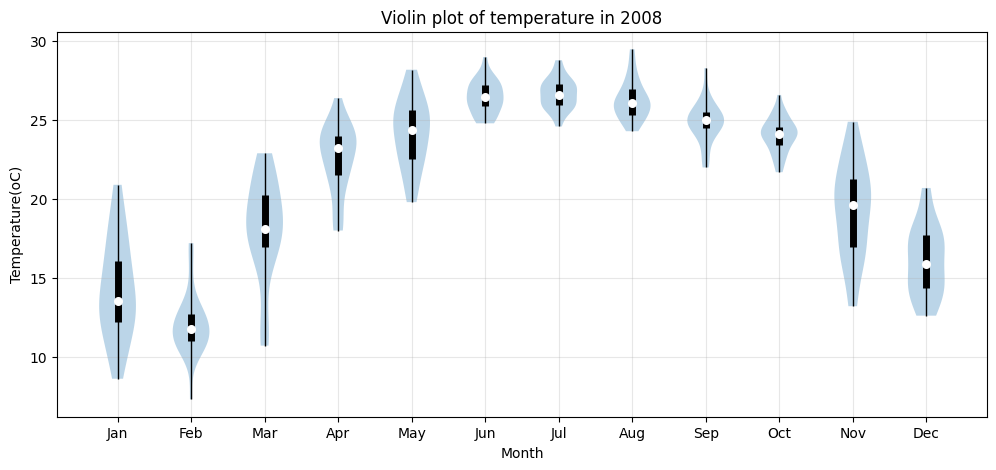

In [17]:
plt.figure(figsize=(12,5))
plt.violinplot(all_day_temperature_box, showmeans=False, showmedians=False, showextrema=False)
plt.grid(True, alpha=0.3)
for i in range(len(all_day_temperature_box)):
    plt.vlines(i+1, np.percentile(all_day_temperature_box[i], 25), np.percentile(all_day_temperature_box[i], 75), color='k', linewidth=5, linestyle='-')
    plt.vlines(i+1, np.min(all_day_temperature_box[i]), np.max(all_day_temperature_box[i]), color='k', linewidth=1, linestyle='-')
    plt.scatter(i+1, np.percentile(all_day_temperature_box[i], 50), marker='o', color='white', s=30, zorder=3)

plt.xlabel('Month')
plt.ylabel('Temperature(oC)')
plt.xticks(np.arange(1, 13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.title('Violin plot of temperature in 2008')
plt.show


Ex 4

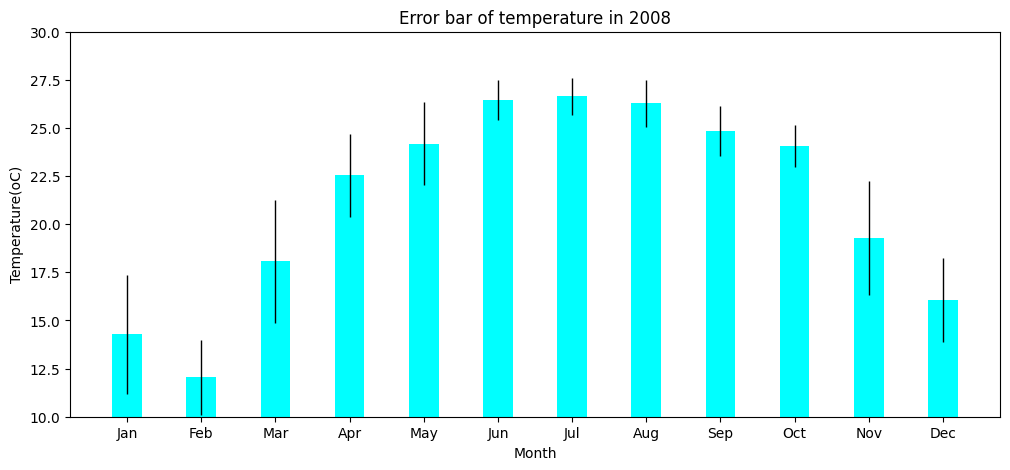

In [23]:
plt.figure(figsize=(12,5))
for i in range(len(all_day_temperature_box)):
    plt.bar(i+1, np.mean(all_day_temperature_box[i]), width=0.4, color='cyan')
    plt.vlines(i+1, np.mean(all_day_temperature_box[i]) - np.std(all_day_temperature_box[i]), np.mean(all_day_temperature_box[i]) + np.std(all_day_temperature_box[i]), color='black', linestyle='-', lw=1)

plt.ylim(10, 30)
plt.xlabel('Month')
plt.ylabel('Temperature(oC)')
plt.xticks(np.arange(1,13), ('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'))
plt.title('Error bar of temperature in 2008')
plt.show()

Ex 5

In [27]:
literature_file = open('HW2_literature_score.txt', 'r')
literature_lines = literature_file.readlines()
literature_file.close()
for i in range(len(literature_lines)):
    literature_lines[i] = literature_lines[i].split()

In [29]:
# Convert to float(Literature)
for i in range(len(literature_lines)):
    for j in range(len(literature_lines[i])):
        literature_lines[i][j] = float(literature_lines[i][j])


In [30]:
math_file = open('HW2_math_score.txt', 'r')
math_lines = math_file.readlines()
math_file.close()
for i in range(len(math_lines)):
    math_lines[i] = math_lines[i].split()

In [32]:
# Convert to float(Math)
for i in range(len(math_lines)):
    for j in range(len(math_lines[i])):
        math_lines[i][j] = float(math_lines[i][j])

In [33]:
# Calculate rank of each student
literature_rank = []
for i in range(len(literature_lines)):
    literature_rank.append([literature_lines[i][0]*0.4 + literature_lines[i][1]*0.6, i+1])
literature_rank.sort(reverse=True)

math_rank = []
for i in range(len(math_lines)):
    math_rank.append([math_lines[i][0]*0.4 + math_lines[i][1]*0.6, i+1])
math_rank.sort(reverse=True)

In [35]:
final_rank = []
for i in range(len(literature_lines)):
    final_rank.append([((literature_lines[i][0] + math_lines[i][0])/2)*0.4 + ((literature_lines[i][1] + math_lines[i][1])/2)*0.6, i+1])
final_rank.sort(reverse=True)

final_rank_cf = final_rank.copy()
final_rank_cf.sort(reverse=True)
# New list get from 10 first element of final_rank_cf
final_rank_cf = final_rank_cf[:10]
for i in range(len(final_rank_cf)):
    if i <= 2:
        final_rank_cf[i][0] = i + 1
    else:
        final_rank_cf[i][0] = '*'

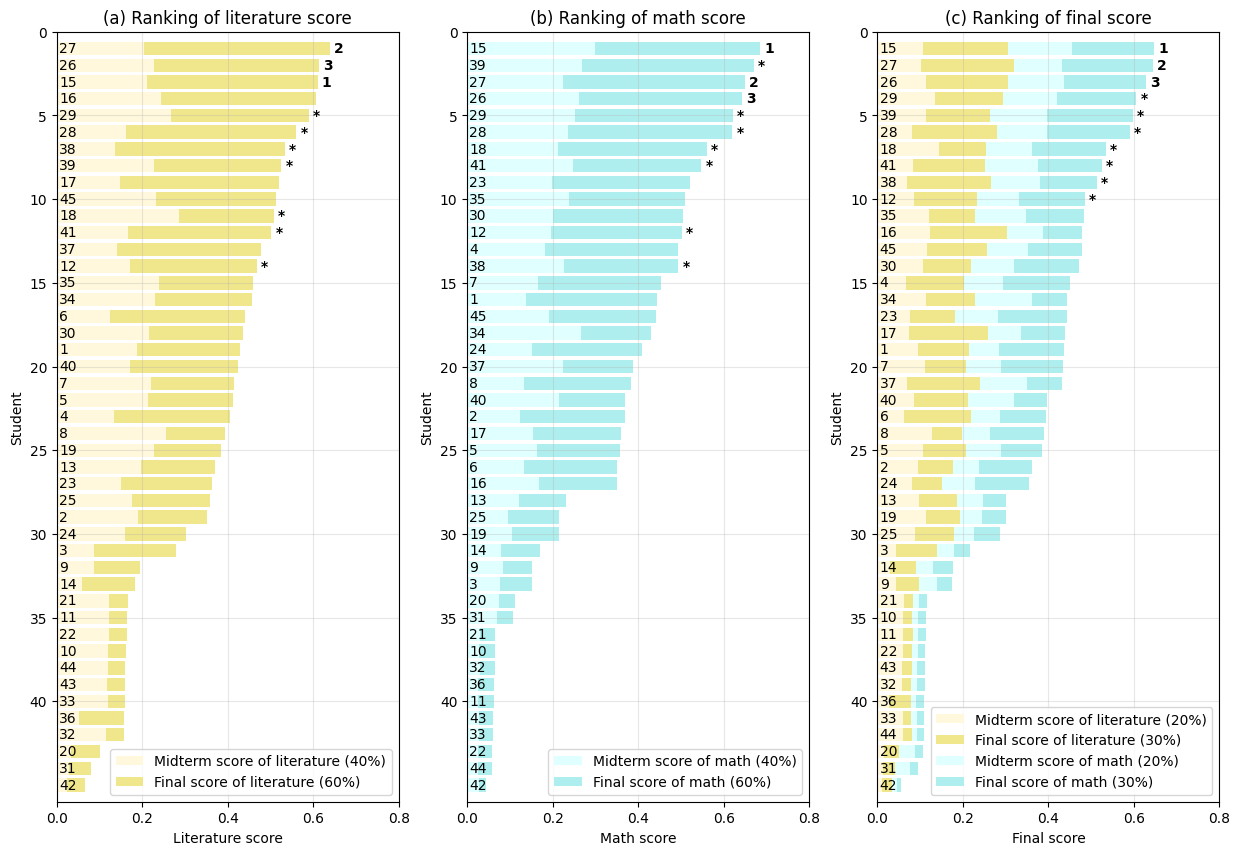

In [44]:
# Plot 3 above charts in 1 figure with 10 first student in final_rank_cf in the right of bar
fig, axs = plt.subplots(1, 3, figsize=(15, 10))
# grid
for i in range(3):
    axs[i].grid(True, alpha=0.3)

axs[0].set_title('(a) Ranking of literature score')
axs[0].invert_yaxis() 
axs[0].set_xlabel('Literature score')
axs[0].set_ylabel('Student')
axs[0].set_xticks(np.arange(0, 0.81, 0.2))
axs[0].set_yticks(np.arange(0, 45, 5))
axs[0].set_xlim(0, 0.8)
axs[0].set_ylim(46, 0)

for i in range(len(literature_rank)):
    # Plot 2 color for midterm x 40% (light color) and final score x 60% (bold color) in each student store in literature_lines
    axs[0].barh(i+1, literature_lines[literature_rank[i][1]-1][0]*0.4, color='cornsilk')
    axs[0].barh(i+1, literature_lines[literature_rank[i][1]-1][1]*0.6, left=literature_lines[literature_rank[i][1]-1][0]*0.4, color='khaki')
    # Print index of student in left of bar
    axs[0].text(0.005, i+1, literature_rank[i][1], fontsize=10, va='center')
    # Print rank of student in right of bar
    for j in range(len(final_rank_cf)):
        if literature_rank[i][1] == final_rank_cf[j][1]:
            axs[0].text(literature_lines[literature_rank[i][1]-1][0]*0.4 + literature_lines[literature_rank[i][1]-1][1]*0.6 + 0.01, i+1, final_rank_cf[j][0], fontsize=10, weight='bold', va='center')

axs[1].set_title('(b) Ranking of math score')
axs[1].invert_yaxis()
axs[1].set_xlabel('Math score')
axs[1].set_ylabel('Student')
axs[1].set_xticks(np.arange(0, 0.81, 0.2))
axs[1].set_yticks(np.arange(0, 45, 5))
axs[1].set_xlim(0, 0.8)
axs[1].set_ylim(46, 0)

for i in range(len(math_rank)):
    # Plot 2 color for midterm x 40% (light color) and final score x 60% (bold color) in each student store in literature_lines
    axs[1].barh(i+1, math_lines[math_rank[i][1]-1][0]*0.4, color='lightcyan')
    axs[1].barh(i+1, math_lines[math_rank[i][1]-1][1]*0.6, left=math_lines[math_rank[i][1]-1][0]*0.4, color='paleturquoise')
    # Print index of student in left of bar
    axs[1].text(0.005, i+1, math_rank[i][1], fontsize=10, va='center')
    # Print rank of student in right of bar
    for j in range(len(final_rank_cf)):
        if math_rank[i][1] == final_rank_cf[j][1]:
            axs[1].text(math_lines[math_rank[i][1]-1][0]*0.4 + math_lines[math_rank[i][1]-1][1]*0.6 + 0.01, i+1, final_rank_cf[j][0], fontsize=10, weight='bold', va='center')

axs[2].set_title('(c) Ranking of final score')
axs[2].invert_yaxis()
axs[2].set_xlabel('Final score')
axs[2].set_ylabel('Student')
axs[2].set_xticks(np.arange(0, 0.81, 0.2))
axs[2].set_yticks(np.arange(0, 45, 5))
axs[2].set_xlim(0, 0.8)
axs[2].set_ylim(46, 0)

for i in range(len(final_rank)):
    # Plot 4 colors for average literature score (mid x 40% and final x 60%) and avg math score (mid x 40% and final x 60%) in each student store in literature_lines
    axs[2].barh(i+1, literature_lines[final_rank[i][1]-1][0]*0.2, color='cornsilk')
    axs[2].barh(i+1, literature_lines[final_rank[i][1]-1][1]*0.3, left=literature_lines[final_rank[i][1]-1][0]*0.2, color='khaki')
    axs[2].barh(i+1, math_lines[final_rank[i][1]-1][0]*0.2, left=literature_lines[final_rank[i][1]-1][0]*0.2 + literature_lines[final_rank[i][1]-1][1]*0.3, color='lightcyan')
    axs[2].barh(i+1, math_lines[final_rank[i][1]-1][1]*0.3, left=literature_lines[final_rank[i][1]-1][0]*0.2 + literature_lines[final_rank[i][1]-1][1]*0.3 + math_lines[final_rank[i][1]-1][0]*0.2, color='paleturquoise')
    # Print index of student in left of bar
    axs[2].text(0.005, i+1, final_rank[i][1], fontsize=10, va='center')
    # Print rank of student in right of bar
    for j in range(len(final_rank_cf)):
        if final_rank[i][1] == final_rank_cf[j][1]:
            axs[2].text(literature_lines[final_rank[i][1]-1][0]*0.2 + literature_lines[final_rank[i][1]-1][1]*0.3 + math_lines[final_rank[i][1]-1][0]*0.2 + math_lines[final_rank[i][1]-1][1]*0.3 + 0.01, i+1, final_rank_cf[j][0], fontsize=10, weight='bold', va='center')

# Draw legend
axs[0].legend(['Midterm score of literature (40%)', 'Final score of literature (60%)'])
axs[1].legend(['Midterm score of math (40%)', 'Final score of math (60%)'])
axs[2].legend(['Midterm score of literature (20%)', 'Final score of literature (30%)', 'Midterm score of math (20%)', 'Final score of math (30%)'])

plt.show()